<a href="https://colab.research.google.com/github/ankitg-02/kaggle-competition/blob/main/Loan_approval_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,classification_report,confusion_matrix

In [ ]:
test_data = pd.read_csv(r'test.csv')
train_data = pd.read_csv(r'train.csv')
sample_data=pd.read_csv(r'sample_submission.csv')

**For Test Data**

In [ ]:
test_data.head()

In [ ]:
test_dataframe=pd.DataFrame(test_data)

In [ ]:
test_dataframe.info()

In [ ]:
test_dataframe.isnull().sum()

In [ ]:
for i in test_dataframe.columns:
    print(i,':\n',test_dataframe[i].unique())

In [ ]:
test_dataframe.describe(include="all")

In [ ]:
mod_test_data=test_dataframe.drop(columns=['id'],axis=1)

In [ ]:
mod_test_data.head()

In [ ]:
mod_test_data.describe(include="all")

In [ ]:
def info(df):
  for i in df.columns:
      if df[i].dtype=='int':
          print(i,':\n',f"mean of {i} :",df[i].mean(),'\n',
                f"median of {i} :",df[i].median(),'\n',
                f"mode of {i} :",df[i].mode(),'\n',
                f"standardisation of {i}:",df[i].std(),'\n',
                f"variance of {i}:",df[i].var(),'\n')
          print('\n')
          q3=df[i].quantile(0.75)
          q1=df[i].quantile(0.25)
          iqr=q3-q1
          upper_limit=q3+1.5*iqr
          lower_limit=q1-1.5*iqr
          print(f'upper limit of {i}:',upper_limit)
          print(f'lower limit of {i}:',lower_limit)
          plt.figure(figsize=(10,5))
          sns.kdeplot(data=df, x=i, hue='cb_person_default_on_file')
          sns.distplot(df[i],bins=10)
          plt.title(f'Distribution of {i}')
          plt.grid(True)
          plt.show()
          print('\n')
      if df[i].dtype=='float':
        print(i,':\n',f"mean of {i} :",df[i].mean(),'\n',
              f"median of {i} :",df[i].median(),'\n',
              f"mode of {i} :",df[i].mode(),'\n',
              f"standardisation of {i}:",df[i].std(),'\n',
              f"variance of {i}:",df[i].var(),'\n')
        print('\n')
        q3=df[i].quantile(0.75)
        q1=df[i].quantile(0.25)
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q1-1.5*iqr
        print(f'upper limit of {i}:',upper_limit)
        print(f'lower limit of {i}:',lower_limit)
        plt.figure(figsize=(10, 5))
        sns.kdeplot(data=df, x=i, hue='cb_person_default_on_file')
        sns.distplot(df[i], bins=10)
        plt.xticks(rotation=90)
        plt.title(f'Distribution of {i}')
        plt.grid(True)
        plt.show()
        print('\n')
      if df[i].dtype=='object':
        plt.figure(figsize=(10,5))
        sns.countplot(df[i],palette='hls')
        plt.xticks(rotation=90)
        plt.title(f'Distribution of {i}')
        plt.show()
        print('\n')

In [ ]:
info(mod_test_data)

In [ ]:
train_data.head()

**For Train Data**

In [ ]:
mod_train_data=train_data.drop(columns=['id'],axis=1)

In [ ]:
mod_train_data.head()

In [ ]:
mod_train_data.info()

In [ ]:
mod_train_data.isnull().sum()

In [ ]:
for i in mod_train_data.columns:
    print(i,':\n',mod_train_data[i].unique(),'\n')

In [ ]:
mod_train_data.describe(include="all")

In [ ]:
info(mod_train_data)

In [ ]:
mod_train_data=mod_train_data[
    (mod_train_data['person_age']>=12.5) & (mod_train_data['person_age']<=40.5) &
    (mod_train_data['person_income']>0) & (mod_train_data['person_income']<=126000.0) &
    (mod_train_data['loan_amnt']>0) & (mod_train_data['loan_amnt']<=22500.0) &
    (mod_train_data['cb_person_cred_hist_length']>0) & (mod_train_data['cb_person_cred_hist_length']<=15.5) &
    (mod_train_data['person_emp_length']>0) & (mod_train_data['person_emp_length']<=14.5) &
    (mod_train_data['loan_int_rate']>=0.21499999999999897) & (mod_train_data['loan_int_rate']<=20.655) &
    (mod_train_data['loan_percent_income']>0) & (mod_train_data['loan_percent_income']<=0.39)
]

In [ ]:
s=StandardScaler()
for i in mod_train_data.columns:
    if mod_train_data[i].dtype=="int":
        mod_train_data[i]=s.fit_transform(mod_train_data[[i]])
    elif mod_train_data[i].dtype=="float":
        mod_train_data[i]=s.fit_transform(mod_train_data[[i]])

In [ ]:
oe = OrdinalEncoder()
transformers = [
    ('home_ownership', oe, ['person_home_ownership']),
    ('loan_intent', oe, ['loan_intent']),
    ('loan_grade', oe, ['loan_grade']),
    ('default_on_file', oe, ['cb_person_default_on_file'])
]
ct = ColumnTransformer(transformers, remainder='passthrough')
mod_train_data_ct = ct.fit_transform(mod_train_data)
make_column_transformerod_1=pd.DataFrame(mod_train_data_ct,columns=mod_train_data.columns)

In [ ]:
make_column_transformerod_1.sample(5)

In [ ]:
make_column_transformerod_1=make_column_transformerod_1.drop(['loan_status'],axis=1)
make_column_transformerod_1['loan_status']=train_data['loan_status']
make_column_transformerod_1['loan_status'].value_counts()
le=LabelEncoder()
make_column_transformerod_1['loan_status']=le.fit_transform(make_column_transformerod_1['loan_status'])
plt.figure(figsize=(10,10))
sns.heatmap(make_column_transformerod_1.corr(),annot=True)

In [ ]:
x=make_column_transformerod_1.iloc[:,:-1]
y=make_column_transformerod_1['loan_status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4,stratify=y)

Accuracy  score of Logistic model: 0.8568129330254042
Recall score of Logistic model: 0.0
F1 score of Logistic model: 0.0
Precision score of Logistic model: 0.0


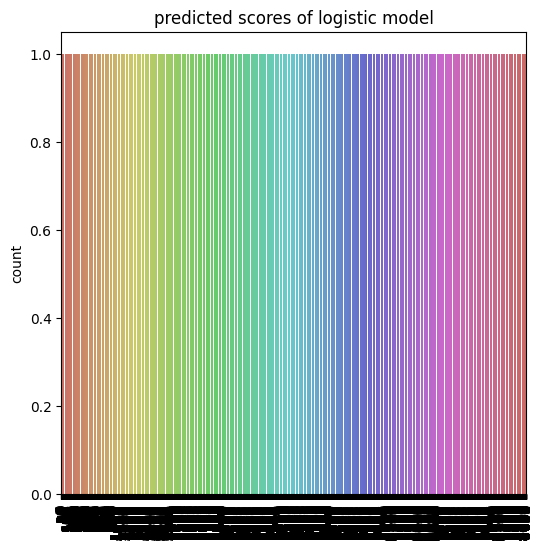

In [42]:
model1=LogisticRegression()
pred1=model1.fit(x_train,y_train).predict(x_test)
print('Accuracy  score of Logistic model:',accuracy_score(y_test,pred1))
print('Recall score of Logistic model:',recall_score(y_test,pred1))
print('F1 score of Logistic model:',f1_score(y_test,pred1))
print('Precision score of Logistic model:',precision_score(y_test,pred1))
plt.figure(figsize=(6,6))
sns.countplot(pred1)
plt.xticks(rotation=90)
plt.title('predicted scores of logistic model')
plt.show()


In [ ]:
model2=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,max_features=11, random_state=9)
pred2=model2.fit(x_train,y_train).predict(x_test)
print('Accuracy  score of DecisionTree model:',accuracy_score(y_test,pred2))
print('Recall score of DecisionTree model:',recall_score(y_test,pred2))
print('F1 score of DecisionTree model:',f1_score(y_test,pred2))
print('Precision score of DecisionTree model:',precision_score(y_test,pred2))
plt.figure(figsize=(6,6))
sns.countplot(pred2)
plt.xticks(rotation=90)
plt.title('predicted scores of DecisionTree model')
plt.show()

In [ ]:
model3 = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_features=11, max_leaf_nodes=None,  n_jobs=11, random_state=9) # Change max_leaf_nodes to None or an integer greater than 1.
pred3 = model3.fit(x_train,y_train).predict(x_test)
print('Accuracy  score of RandomForest model:',accuracy_score(y_test,pred3))
print('Recall score of RandomForest model:',recall_score(y_test,pred3))
print('F1 score of RandomForest model:',f1_score(y_test,pred3))
print('Precision score of RandomForest model:',precision_score(y_test,pred3))
plt.figure(figsize=(6,6))
sns.countplot(pred3,palette='hls')
plt.xticks(rotation=90)
plt.title('predicted scores of RandomForest model')
plt.show()

Accuracy  score of RandomForest model: 0.8561200923787529
Recall score of RandomForest model: 0.0024193548387096775
F1 score of RandomForest model: 0.004792332268370607
Precision score of RandomForest model: 0.25


In [ ]:
model4=KNeighborsClassifier()
pred4=model4.fit(x_train,y_train).predict(x_test)
print('Accuracy  score of KNeighbors model:',accuracy_score(y_test,pred4))
print('Recall score of KNeighbors model:',recall_score(y_test,pred4))
print('F1 score of KNeighbors model:',f1_score(y_test,pred4))
print('Precision score of KNeighbors model:',precision_score(y_test,pred4))
plt.figure(figsize=(6,6))
sns.countplot(pred4,palette='hls')
plt.xticks(rotation=90)
plt.title('predicted scores of KNeighbors model')
plt.show()

In [ ]:
model5=SVC(kernel='rbf', random_state=42)
pred5=model5.fit(x_train,y_train).predict(x_test)
print('Accuracy  score of SVC model:',accuracy_score(y_test,pred5))
print('Recall score of SVC model:',recall_score(y_test,pred5))
print('F1 score of SVC model:',f1_score(y_test,pred5))
print('Precision score of SVC model:',precision_score(y_test,pred5))
plt.figure(figsize=(6,6))
sns.countplot(pred5,palette='hls')
plt.xticks(rotation=90)
plt.title('predicted scores of SVC model')
plt.show()

In [ ]:
model6=GaussianNB()
pred6=model6.fit(x_train,y_train).predict(x_test)
print('Accuracy  score of GaussianNB model:',accuracy_score(y_test,pred6))
print('Recall score of GaussianNB model:',recall_score(y_test,pred6))
print('F1 score of GaussianNB model:',f1_score(y_test,pred6))
print('Precision score of GaussianNB model:',precision_score(y_test,pred6))
plt.figure(figsize=(6,6))
sns.countplot(pred6,palette='hls')
plt.xticks(rotation=90)
plt.title('predicted scores of GaussianNB model')
plt.show()

In [ ]:
model7=AdaBoostClassifier()
pred7=model7.fit(x_train,y_train).predict(x_test)
print('Accuracy  score of DecisionTree model:',accuracy_score(y_test,pred2))
print('Recall score of DecisionTree model:',recall_score(y_test,pred2))
print('F1 score of DecisionTree model:',f1_score(y_test,pred2))
print('Precision score of DecisionTree model:',precision_score(y_test,pred2))
plt.figure(figsize=(6,6))
sns.countplot(pred7,palette='hls')
plt.xticks(rotation=90)
plt.title('predicted scores of AdaBoost model')
plt.show()

In [ ]:
model8=GradientBoostingClassifier()
pred8=model8.fit(x_train,y_train).predict(x_test)
print('Accuracy  score of GradientBoosting model:',accuracy_score(y_test,pred8))
print('Recall score of GradientBoosting model:',recall_score(y_test,pred8))
print('F1 score of GradientBoosting model:',f1_score(y_test,pred8))
print('Precision score of GradientBoosting model:',precision_score(y_test,pred8))
plt.figure(figsize=(6,6))
sns.countplot(pred8,palette='hls')
plt.xticks(rotation=90)
plt.title('predicted scores of GradientBoosting model')
plt.show()

In [ ]:
model9=ExtraTreesClassifier(criterion='gini', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=11, random_state=7)
pred9=model9.fit(x_train,y_train).predict(x_test)
print('Accuracy  score of ExtraTrees model:',accuracy_score(y_test,pred9))
print('Recall score of ExtraTrees model:',recall_score(y_test,pred9))
print('F1 score of ExtraTrees model:',f1_score(y_test,pred9))
print('Precision score of ExtraTrees model:',precision_score(y_test,pred9))
plt.figure(figsize=(6,6))
sns.countplot(pred9,palette='hls')
plt.xticks(rotation=90)
plt.title('predicted scores of ExtraTrees model')